In [1]:
from IPython.display import Image

import tensorflow as tf
import matplotlib.pyplot as plt
import random

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

ModuleNotFoundError: No module named 'input_data'

In [2]:
 print(tf.__version__)

1.14.0


# Cf. MNIST DATASET

- 28 * 28 픽셀 --> 784 개의 pixel (X)


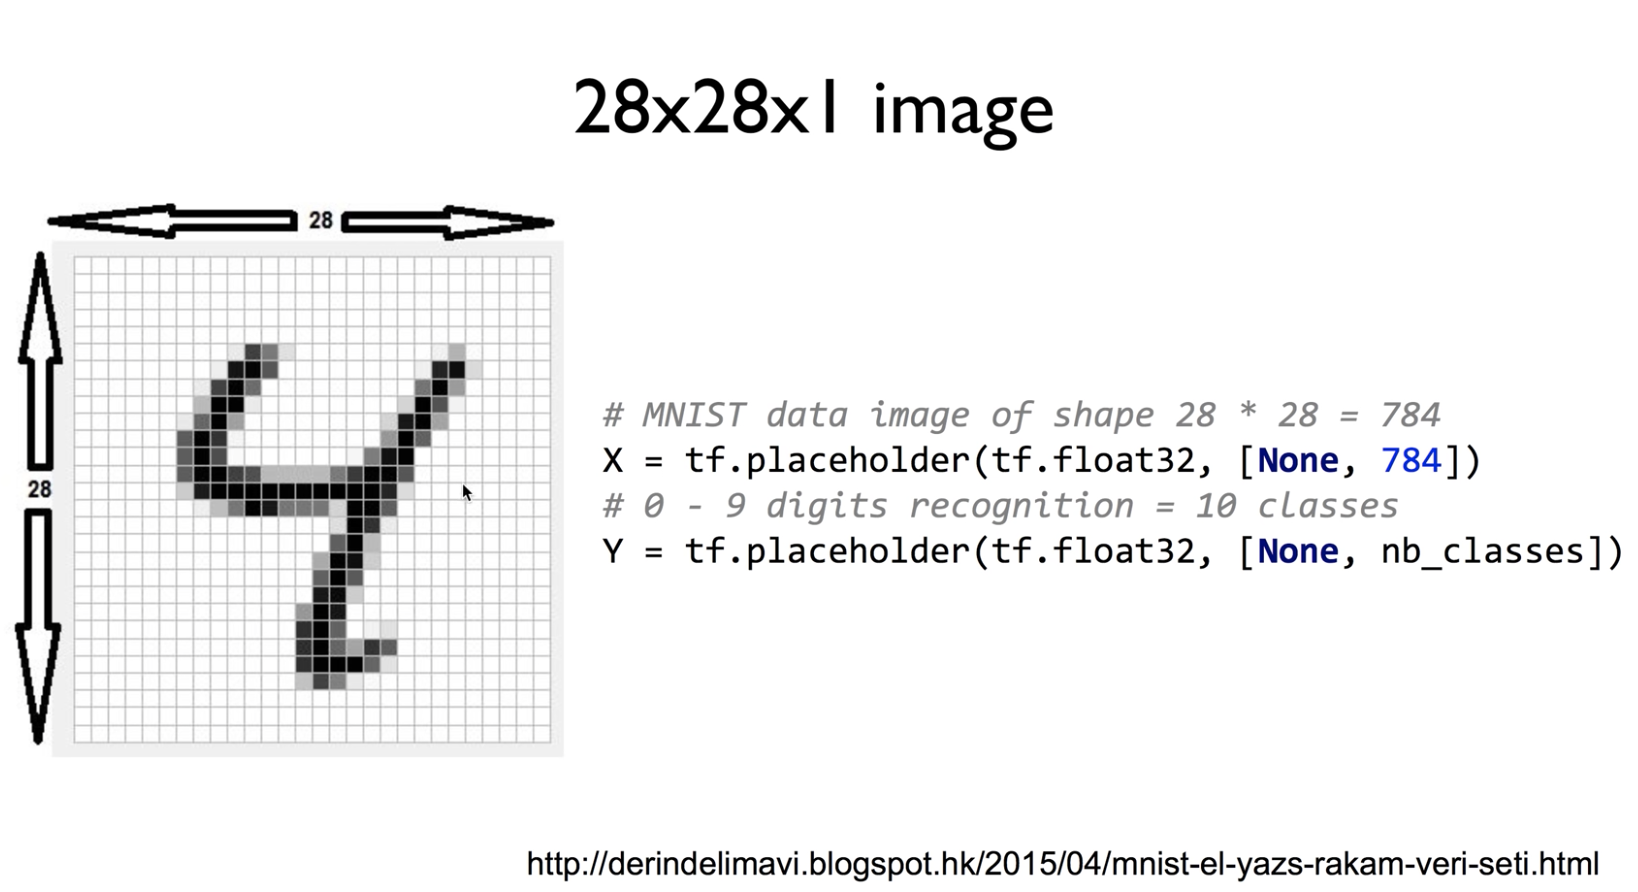

In [3]:
Image("img/TF_MNIST.png") # code안에서 나오게 할 때

## Training Epoch / batch

"Iterative Algorithm" == gradient descent 와 같이, 결과를 얻기 위해 여러번의 최적화 과정을 거쳐야 되는 알고리즘

- one epoch = one forward pass and one backward pass of all the training examples

- batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need

- number of iterations = number os passes, each pass using [batch size] number of examplels.
    - (one pass = one forward pass + one backward pass)
Ex)

- epoch = 10 : 전체 학습 데이터셋을 10번 학습
- batch = 100 : 한 번에 100개의 데이터를 학습

Ex)
100 개의 training 데이ㅌ, batch size = 500
--> 1 epoch 을 하는 데에 2번의 iteration


cf. https://m.blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221449297033&proxyReferer=https%3A%2F%2Fwww.google.com%2F

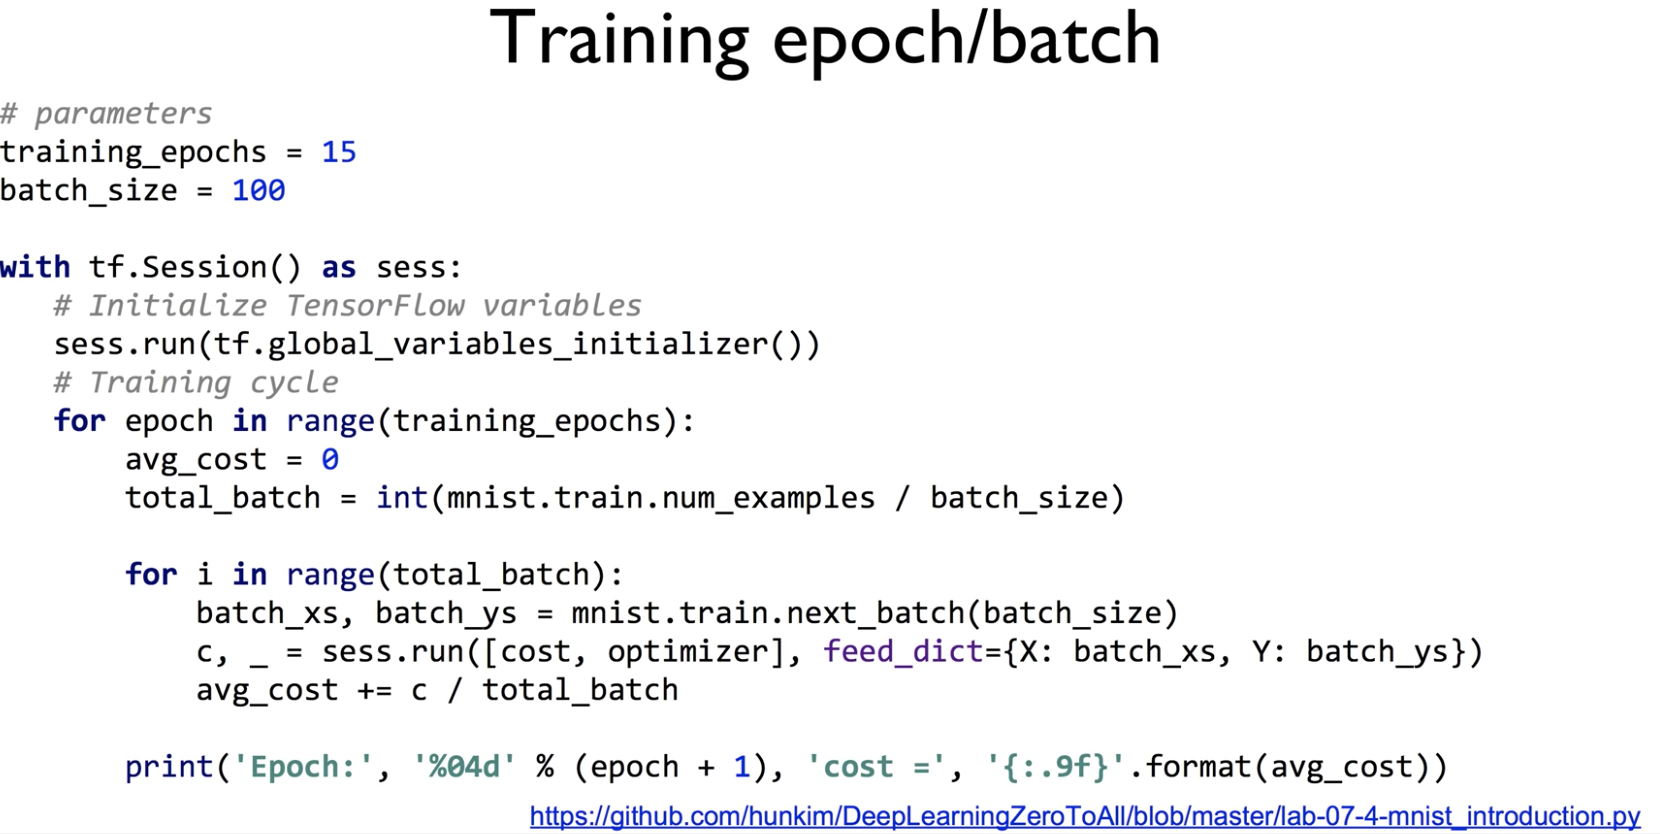

In [4]:
Image("img/TF_Epoch_Batch.png") # code안에서 나오게 할 때

# 학습 수
## training_epochs = 15

# Iteration 수
## total_batch = int(mnist.train.num_examples / batch_size)


# MNIST 데이터 !!!!!!!

- mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
--> 계속 TypeError...

- data_train, data_test = tf.keras.datasets.mnist.load_data()



In [44]:
from tensorflow import keras
from tensorflow.keras import layers
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
from tensorflow.examples.tutorials.mnist import input_data


# Download the mnist dataset using keras
data_train, data_test = tf.keras.datasets.mnist.load_data()

# Parse images and labels
(images_train, labels_train) = data_train
(images_test, labels_test) = data_test

In [45]:
validation_size = 5000

# images
images_validation = images_train[-validation_size:]
images_train      = images_train[:validation_size]

# labels
labels_validation = labels_train[-validation_size:]
labels_train      = labels_train[:validation_size]

In [46]:
images_train = np.expand_dims(images_train, axis=-1)
images_validation = np.expand_dims(images_validation, axis=-1)
images_test = np.expand_dims(images_test, axis=-1)

TypeError: Invalid shape (28, 28, 1) for image data

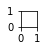

In [47]:
plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(images_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [16]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

## tf.contrib, tf.keras --> 같은 데이터!

In [29]:
# import tensorflow as tf
# from tensorflow.contrib.learn.python.learn.datasets import mnist

# # 1. tf.contrib
# # datasets = mnist.read_data_sets('', dtype=tf.uint8, reshape=False, validation_size=0)
# # images_train = datasets.train.images
# # labels_train = datasets.train.labels
# # images_test = datasets.test.images
# # labels_test = datasets.test.labels

# # 2. keras
# data_train, data_test = tf.keras.datasets.mnist.load_data()
# (x_train, y_train) = data_train
# (x_test, y_test) = data_test
# x_train = np.expand_dims(x_train, axis=-1)
# x_test = np.expand_dims(x_test, axis=-1)

# # 3. Check
# print(np.all(images_train == x_train))
# print(np.all(labels_train == y_train))
# print(np.all(images_test == x_test))
# print(np.all(labels_test == y_test))


In [31]:
# images_train.shape[0]
# next_batch(5, images_train, labels_train)

5000

## 코드 변경 필요!

1. (images_train, labels_train) = data_train
2. (images_test, labels_test) = data_test

- mnist.train.num_examples
    - images_train.shape[0]

- mnist.train.next_batch(batch_size)           
    - next_batch() 재정의
    - batch_xs, batch_ys  = next_batch(5, images_train, labels_train)



In [39]:
!pip install keras

     |████████████████████████████████| 377 kB 183 kB/s eta 0:00:01
     |████████████████████████████████| 268 kB 11.1 MB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done


In [40]:
import keras
labels_train = keras.to_categorical(labels_train)

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_train[:5]

ModuleNotFoundError: No module named 'keras'

In [33]:

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(images_train.shape[0] / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys  = next_batch(5, images_train, labels_train)
#             batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, 
            feed_dict={X: images_test, Y: labels_tes}
        ),
    )

#     # Get one and predict
#     r = random.randint(0, data_test.shape[0] - 1)
#     print("Label: ", sess.run(tf.argmax(x_test[r : r + 1], 1)))
#     print(
#             "Prediction: ",
#             sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test[r : r + 1]}),
#     )

#      r = random.randint(0, data_test.shape[0] - 1)
#     print("Label: ", sess.run(tf.argmax(x_test[r : r + 1], 1)))
#     print(
#             "Prediction: ",
#             sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test[r : r + 1]}),
#     )



ValueError: Cannot feed value of shape (5, 28, 28, 1) for Tensor 'Placeholder_4:0', which has shape '(?, 784)'